## Unit 3 lesson 5.3
Boosting guided example. The goal is to predict if someone lives with a partner or not

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn.model_selection import train_test_split

In [2]:
# load the data
df = pd.read_csv(
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
# check the shape
print(df.shape)

# check for null values
print("\nnull values:")
print(df.isnull().sum())

(8594, 13)

null values:
cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64


In [4]:
# dropping null values
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


In [6]:
# number of unique values of each column
for col in df.columns:
    print("col '{}'' has {} unique values".format(col, df[col].nunique()))

col 'cntry'' has 6 unique values
col 'idno'' has 3076 unique values
col 'year'' has 2 unique values
col 'tvtot'' has 8 unique values
col 'ppltrst'' has 11 unique values
col 'pplfair'' has 11 unique values
col 'pplhlp'' has 11 unique values
col 'happy'' has 11 unique values
col 'sclmeet'' has 7 unique values
col 'sclact'' has 5 unique values
col 'gndr'' has 2 unique values
col 'agea'' has 83 unique values
col 'partner'' has 2 unique values


In [7]:
# I can't see how the ID column help us, therefore, I'll drop it
df = df.drop('idno', axis=1)

In [8]:
# change partner to 0 (no partner) and 1 (with partner)
prt = df['partner'] == 2.0 
df['partner'] = np.where(prt, 1, 0)

df.head(3)

,cntry,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,0
1,CH,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,0
2,CH,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1


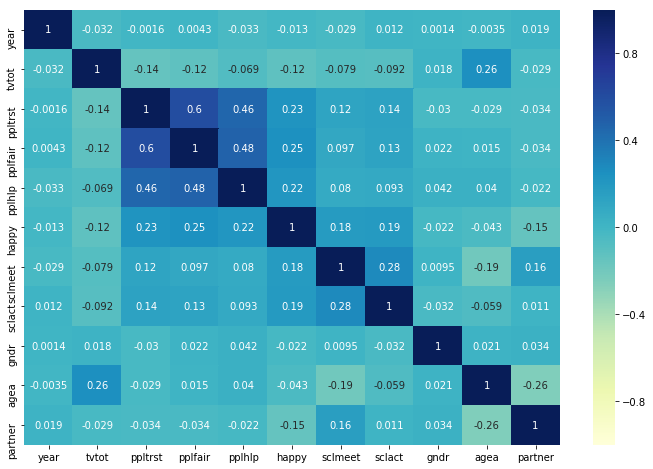

In [9]:
# get numeric columns
numeric_df = df._get_numeric_data()

# correlations between numeric
corr = numeric_df.corr()

# heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, vmax=1, vmin=-1, annot=True, annot_kws={"size": 10}, cmap='YlGnBu')

From above it seems that _age_ as the most negative correlation; _happy_ the second next, and _sclmeet_ has the highest (positive) correlation<br>Also, from above (cell #6) it seems that _gndr_ and _year_ can become binary as well; _gndr_ has values 1 or 2, _yaer_ has values 6 or 7

In [10]:
# make gender binary
df['gndr'] = np.where(df['gndr'] == 2, 1, 0)

# make year binary
df['year'] = np.where(df['year'] == 7, 1, 0)

df.head()

,cntry,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,0,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1,60.0,0
1,CH,0,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1,59.0,0
2,CH,0,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0,24.0,1
3,CH,0,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1,64.0,0
4,CH,0,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1,55.0,0


Next, I'll add three columns, age^2, happy^2, sclmeet^2. Then I'll make dummy cntry.

In [11]:
# create columns
df['agea_sqr'] = df['agea'] ** 2
df['happy_sqr'] = df['happy'] ** 2
df['sclmeet_sqr'] = df['sclmeet'] ** 2

# create dummies
df = pd.concat([df, pd.get_dummies(df['cntry'])], axis=1)

# drop the country column
df = df.drop('cntry', axis=1)

df.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,agea_sqr,happy_sqr,sclmeet_sqr,CH,CZ,DE,ES,NO,SE
0,0,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1,60.0,0,3600.0,64.0,25.0,1,0,0,0,0,0
1,0,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1,59.0,0,3481.0,81.0,9.0,1,0,0,0,0,0
2,0,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0,24.0,1,576.0,49.0,36.0,1,0,0,0,0,0
3,0,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1,64.0,0,4096.0,100.0,36.0,1,0,0,0,0,0
4,0,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1,55.0,0,3025.0,64.0,49.0,1,0,0,0,0,0


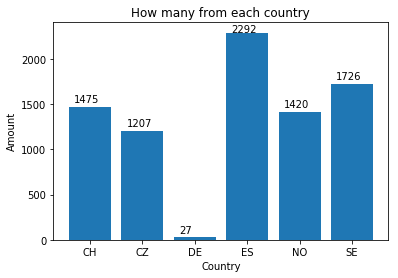

In [12]:
# show how many from each country
cntry = df[['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']]

# the height of each one
height = []
for col in cntry:
    height.append((cntry[col] == 1).sum())

# how many bars
y_pos = np.arange(6)

# plot the graph
plt.bar(y_pos, height=height, tick_label=cntry.columns)
plt.title('How many from each country')
plt.xlabel('Country')
plt.ylabel('Amount')

# put the numbers above the bar
plt.text(-0.3, height[0] + 50, height[0], fontsize=10, color='black')
plt.text(0.7, height[1] + 50, height[1], fontsize=10, color='black')
plt.text(1.7, height[2] + 50, height[2], fontsize=10, color='black')
plt.text(2.7, height[3] + 10, height[3], fontsize=10, color='black')
plt.text(3.7, height[4] + 50, height[4], fontsize=10, color='black')
plt.text(4.7, height[5] + 50, height[5], fontsize=10, color='black')

plt.show()

In [13]:
# split to X and y and train and test
X = df.drop('partner', axis=1)
y = df['partner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# i * 100 iterations, i-deep trees, and set our loss function.
score_list = []
for i in range(1, 21, 2):
    params = {'n_estimators': i*100,
          'max_depth': i,
          'loss': 'exponential'} # deviance
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    score_list.append(clf.score(X_test, y_test))
    
score_list

[0.7374233128834355,
 0.7539877300613497,
 0.7398773006134969,
 0.7349693251533742,
 0.7319018404907975,
 0.7312883435582822,
 0.7319018404907975,
 0.7147239263803681,
 0.7196319018404908,
 0.6957055214723926]

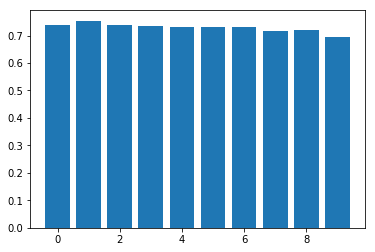

In [15]:
h = np.arange(len(score_list))

plt.bar(h, score_list)
plt.show()

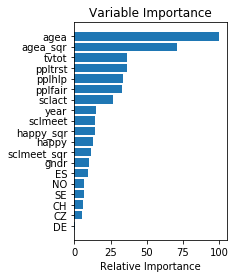

In [16]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

From above, it seems that when increasing the number of iterations and the depth (together) the results seem to get worse. Also, since _DE_ is very few people, its importance is none. <br>
Next, I'll add a few more columns of the ones that seem the most important ones and rerun the model.

In [17]:
# math opperations of a few columns
agea_log = np.log(df['agea'])

df['pplhlp_sqr'] = df['pplhlp'] ** 2
df['pplhlp_log'] = np.log(df['pplhlp'])

df['tvtot_sqr'] = df['tvtot'] ** 2
df['tvtot_log'] = np.log(df['tvtot'])

df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,...,CH,CZ,DE,ES,NO,SE,pplhlp_sqr,pplhlp_log,tvtot_sqr,tvtot_log
0,0,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1,60.0,...,1,0,0,0,0,0,25.0,1.609438,9.0,1.098612
1,0,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1,59.0,...,1,0,0,0,0,0,25.0,1.609438,36.0,1.791759
2,0,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0,24.0,...,1,0,0,0,0,0,64.0,2.079442,1.0,0.000000
3,0,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1,64.0,...,1,0,0,0,0,0,49.0,1.945910,16.0,1.386294
4,0,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1,55.0,...,1,0,0,0,0,0,25.0,1.609438,25.0,1.609438


In [18]:
# i * 100 iterations, i-deep trees, and set our loss function.
# VERY SLOW TO RUN!
score_list = []
for i in range(1, 21, 2):
    params = {'n_estimators': i*100,
          'max_depth': i,
          'loss': 'exponential'} # deviance
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    score_list.append(clf.score(X_test, y_test))
    
score_list

[0.7374233128834355,
 0.7539877300613497,
 0.7398773006134969,
 0.7331288343558282,
 0.7319018404907975,
 0.7325153374233129,
 0.7349693251533742,
 0.7190184049079754,
 0.7239263803680982,
 0.6815950920245398]

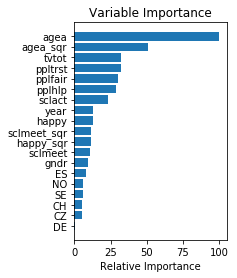

In [19]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Summary
All around I would define this short experiment as a failure. It seems that whatever I did didn't improve the results. Options for future investigation are
- changing only one parameter (not both estimators and steps) and then the other
- try more loss functions (I only tried exponential and deviance and couldn't see a difference)
- do better feature engineering
- remove unhelpful columns (such as countries)